# <span style='font-family:Georgia'> Ergodicity


$$r_1 = 1.5 \text{ with } p_1 = 0.5\\
r_2 = 0.6 \text{ with } p_2 = 0.5$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <span style='font-family:Georgia'> Ensemble Average

$$\langle r \rangle = r_1 \cdot p_1 + r_2 \cdot p_2 = \frac{1}{2} \cdot 1.5 + \frac{1}{2} \cdot 0.6 = 1.05$$

So, the continuous growth rate is:

$$ \ln \langle r \rangle \approx 4.9 \%$$

## <span style='font-family:Georgia'> Time Average

$$\bar r = r_1^{p_1} \cdot r_2^{p_2} = 1.5^{\frac{1}{2}} \cdot 0.6^{\frac{1}{2}} \approx 0.95$$

So, the continuous growth rate is:

$$ \ln \bar r \approx -5.1 \%$$

In [10]:
n = 1000
r_pos = 1.5
r_neg = 0.6
decay = ((r_pos)*(r_neg))**(1/2) # decay factor
print('Multiplication factor:', decay)

Multiplication factor: 0.9486832980505138


In [44]:
w_paths_dict = {}
for j in range(0, 1000):
    w = 1
    decay_w = 1
    w_dict = {}
    decay_dict = {}

    w_dict[0] = w
    decay_dict[0] = decay_w

    realiz = np.random.choice([r_pos, r_neg], [n])

    for cnt, i in enumerate(realiz):
        w = w * i
        w_dict[cnt + 1] = w
        decay_w = decay_w * decay
        decay_dict[cnt + 1] = decay_w

    w_paths_dict[j] = pd.Series(w_dict)

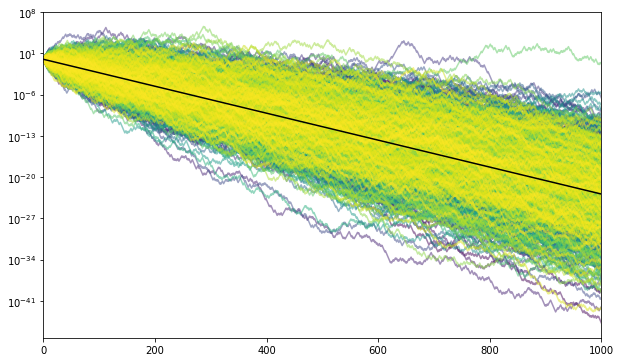

In [45]:
w_paths = pd.DataFrame(w_paths_dict)
w_paths.plot(logy=True, figsize=(10, 6), cmap='viridis', legend=False, alpha=0.5)
pd.Series(decay_dict).plot(logy=True, color='black')
plt.show()

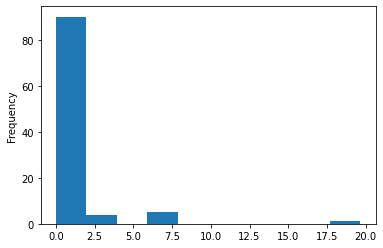

In [24]:
w_paths.loc[100, :].plot(kind='hist')
plt.show()

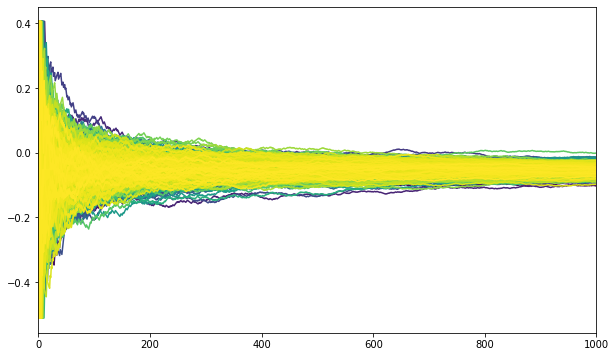

In [48]:
log_growth_avg = (np.log(w_paths) - np.log(w_paths).shift()).expanding().mean()
log_growth_avg.plot(legend=False, cmap='viridis', figsize=(10, 6))
plt.show()

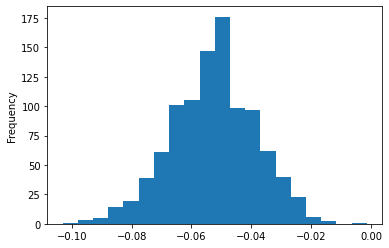

In [54]:
log_growth_avg.loc[1000, :].plot(kind='hist', bins=20)

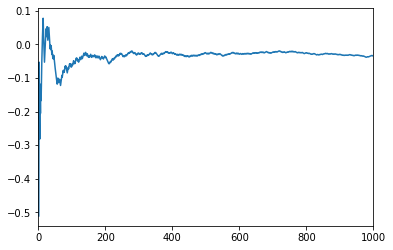

In [8]:
(np.log(pd.Series(w_dict))- np.log(pd.Series(w_dict).shift())).expanding().mean().plot()
plt.show()

In [50]:
(np.log(pd.Series(w_dict))- np.log(pd.Series(w_dict).shift())).expanding().mean()

0             NaN
1        0.405465
2        0.405465
3        0.100035
4        0.176392
           ...   
9996    -0.053505
9997    -0.053459
9998    -0.053413
9999    -0.053368
10000   -0.053413
Length: 10001, dtype: float64